In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import pycountry
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Data%20Science%20Job%20Salaries/ds_salaries.csv", index_col = 0)

In [3]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [7]:
resi_country_list = []
comp_country_list = []
for country_code in df.employee_residence:
    resi_country_list.append(pycountry.countries.get(alpha_2=country_code).name)

for country_code in df.company_location:
    comp_country_list.append(pycountry.countries.get(alpha_2=country_code).name)

df['employee_residence'] = resi_country_list
df['company_location'] = comp_country_list

df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,Hybrid,United Kingdom,M
3,2020,Mid,FT,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,United States,Hybrid,United States,L


In [12]:
px.bar(df, x = 'remote_ratio', title='Bar graph of Work Type')

In [14]:
px.histogram(df, x = df.employee_residence.sort_values(), title='Count of Employee residence in each country')

In [15]:
px.scatter(df, x=df.employee_residence.sort_values(), y = df.company_location.sort_values(), color = 'remote_ratio',
           labels ={"x":'Employee Residence', "y":'Company Location', "remote_ratio":'Work Type', 'salary_in_usd':'Salary(USD)'}, 
           title = 'Company Location VS Employee Residence for type of work(Remote, Hybrid or On-site)')
px.histogram(df, x=df.job_title.sort_values(), color = 'experience_level', height = 800, barmode = 'group',
             text_auto  = True, title = 'Count of number of people with all experience levels in each job')
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title', 
           animation_frame = 'work_year', title = 'Experience level VS Salary')

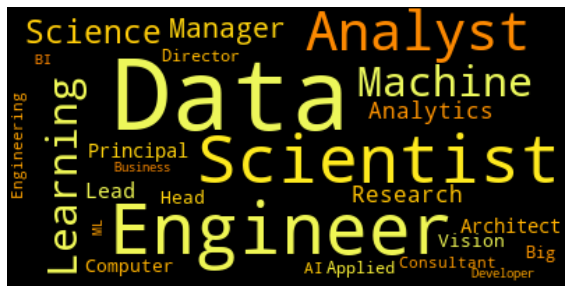

In [17]:
text = " ".join(job_titles for job_titles in df["job_title"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'Wistia', min_font_size = 8).generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()